In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, Embedding, RepeatVector, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam


In [2]:
import pandas as pd

# Load the list_attr_celeba.csv file
attributes_df = pd.read_csv('list_attr_celeba (1).csv')

# Preview the first few rows
print(attributes_df.head())


    File_name  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
0  000001.jpg                -1                1           1               -1   
1  000002.jpg                -1               -1          -1                1   
2  000003.jpg                -1               -1          -1               -1   
3  000004.jpg                -1               -1           1               -1   
4  000005.jpg                -1                1           1               -1   

   Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  Sideburns  Smiling  \
0    -1     -1        -1        -1          -1  ...         -1        1   
1    -1     -1        -1         1          -1  ...         -1        1   
2    -1     -1         1        -1          -1  ...         -1       -1   
3    -1     -1        -1        -1          -1  ...         -1       -1   
4    -1     -1         1        -1          -1  ...         -1       -1   

   Straight_Hair  Wavy_Hair  Wearing_Earrings  Wearing_Hat  We

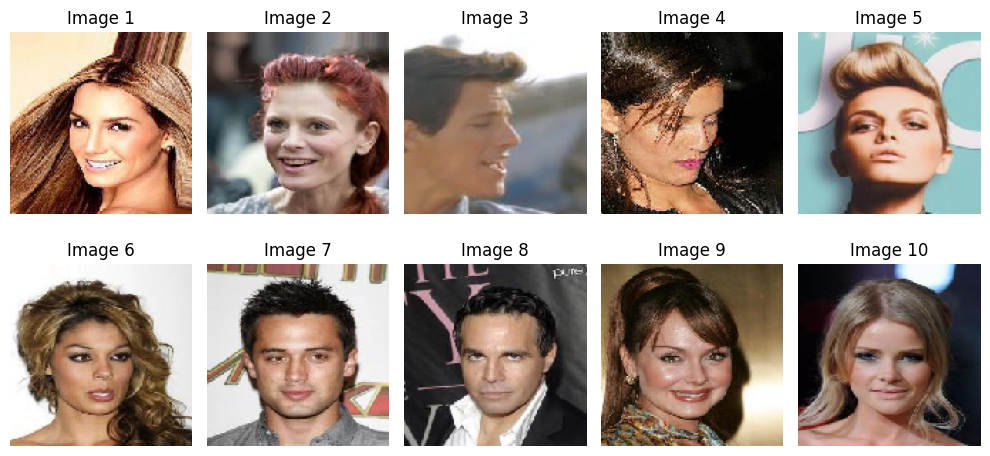

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

# Load the attribute labels from the CSV file
attributes_df = pd.read_csv('list_attr_celeba (1).csv')

# Specify the image folder path
image_folder = 'img_align_celeba'  # Update with the actual path to your image folder
# Resize dimensions
target_size = (128, 128)  # Resize to 128x128 for uniformity

# Visualize 10 sample images from the dataset
plt.figure(figsize=(10, 5))
for i in range(10):
    # Get the file name of the image
    img_file = os.path.join(image_folder, attributes_df.iloc[i, 0])
    
    # Load and resize the image
    img = load_img(img_file, target_size=target_size)
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    
    # Plot the image
    plt.subplot(2, 5, i + 1)
    plt.imshow(img_array)
    plt.axis('off')
    plt.title(f"Image {i + 1}")

plt.tight_layout()
plt.show()


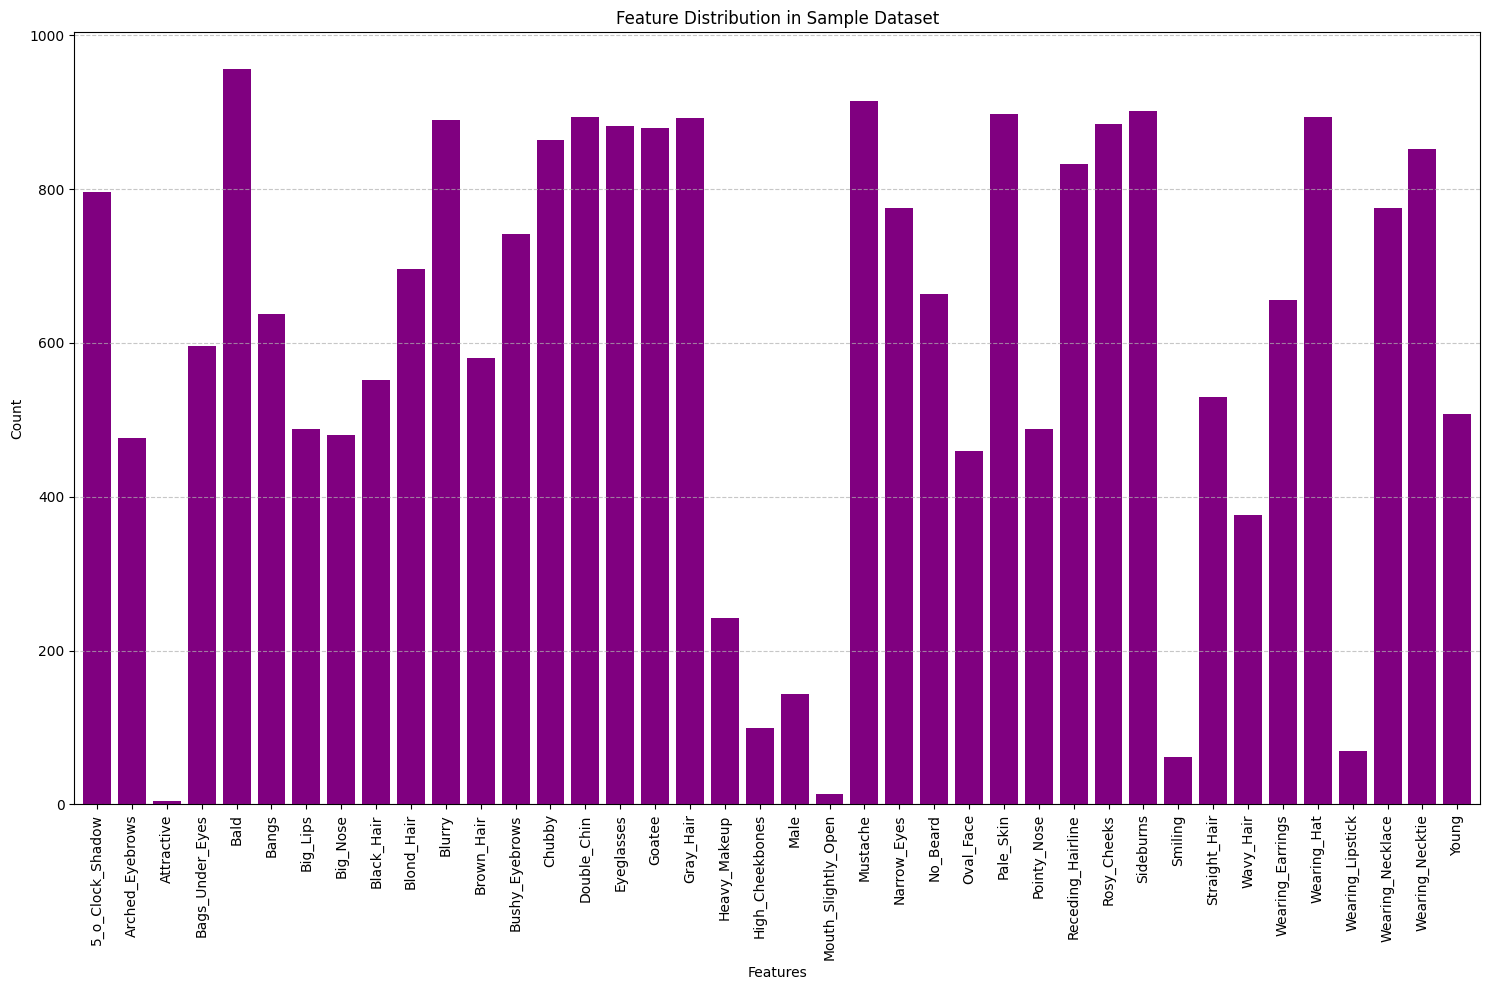

In [4]:
import matplotlib.pyplot as plt

# Sample a portion of the dataset (adjust sample size as needed)
sample_df = attributes_df.sample(n=1000, random_state=42)

# Sum the occurrences of each feature and take absolute values to avoid negative bars
feature_counts = sample_df.iloc[:, 1:].sum().abs()

# Plot a bar graph for feature distribution with adjustments
plt.figure(figsize=(15, 10))  # Larger figure size for better visibility
feature_counts.plot(kind='bar', color='purple', width=0.8)  # Purple color and slightly wider bars
plt.title("Feature Distribution in Sample Dataset")
plt.xlabel("Features")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a light grid for y-axis for better readability
plt.tight_layout()  # Adjust layout to ensure labels fit

plt.show()


In [5]:
import os

# Get the list of actual image files in the directory
available_images = set(os.listdir(image_folder))

# Check for missing files in the DataFrame
missing_files = [fname for fname in attributes_df['File_name'] if fname not in available_images]

# Print out the number of missing files and sample missing files (if any)
print(f"Total missing files: {len(missing_files)}")
print("Sample of missing files:", missing_files[:10])
# Filter out rows with missing files
attributes_df = attributes_df[attributes_df['File_name'].isin(available_images)]

# Confirm the number of images now matches
print(f"Total images after filtering missing files: {len(attributes_df)}")


Total missing files: 0
Sample of missing files: []
Total images after filtering missing files: 202599


In [6]:
# Load and preprocess the CSV file
attributes_df = pd.read_csv('list_attr_celeba (1).csv')

# Convert -1 to 0 for binary classification
for column in attributes_df.columns[1:]:
    attributes_df[column] = attributes_df[column].replace(-1, 0)
    # Print sample data to confirm label replacement
print("Sample data after label replacement (-1 to 0):")
print(attributes_df.head())


Sample data after label replacement (-1 to 0):
    File_name  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
0  000001.jpg                 0                1           1                0   
1  000002.jpg                 0                0           0                1   
2  000003.jpg                 0                0           0                0   
3  000004.jpg                 0                0           1                0   
4  000005.jpg                 0                1           1                0   

   Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  Sideburns  Smiling  \
0     0      0         0         0           0  ...          0        1   
1     0      0         0         1           0  ...          0        1   
2     0      0         1         0           0  ...          0        0   
3     0      0         0         0           0  ...          0        0   
4     0      0         1         0           0  ...          0        0   

   Straight_Hai

In [7]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Load and preprocess the CSV file
attributes_df = pd.read_csv('list_attr_celeba (1).csv')

# Convert -1 to 0 for binary classification
for column in attributes_df.columns[1:]:
    attributes_df[column] = attributes_df[column].replace(-1, 0)

# Split into training and testing sets
train_df, test_df = train_test_split(attributes_df, test_size=0.2, random_state=42)

# Print the shape of train_df
print(f"Shape of train_df (80% of total data): {train_df.shape}")
print(f"Shape of test_df (20% of total data): {test_df.shape}")

# Define the number of subsets and calculate subset size
num_subsets = 4
subset_size = len(train_df) // num_subsets
print(f"\nDividing train_df into {num_subsets} subsets, each containing approximately {subset_size} images.")

# Set up ImageDataGenerator for training and testing with rescaling
train_datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create training and validation generators for the first subset as an example
subset_df = train_df.iloc[:subset_size]
train_generator = train_datagen.flow_from_dataframe(
    dataframe=subset_df,
    directory='img_align_celeba',  # Update with the correct path
    x_col='File_name',
    y_col=subset_df.columns[1:],  # All attribute columns after 'File_name'
    target_size=(128, 128),
    batch_size=64,
    class_mode='raw',
    shuffle=True,
    subset='training'
)

validation_generator = train_datagen.flow_from_dataframe(
    dataframe=subset_df,
    directory='img_align_celeba',  # Update with the correct path
    x_col='File_name',
    y_col=subset_df.columns[1:],  # All attribute columns after 'File_name'
    target_size=(128, 128),
    batch_size=64,
    class_mode='raw',
    shuffle=True,
    subset='validation'
)

# Print the number of images in training and validation
print(f"\nFor each subset (example here for subset 1):")
print(f"Training images count: {train_generator.samples}")
print(f"Validation images count: {validation_generator.samples}")

# Calculate the total images in train and validation for all 4 subsets
total_training_images = train_generator.samples * num_subsets
total_validation_images = validation_generator.samples * num_subsets

print(f"\nTotal training images across all subsets: {total_training_images}")
print(f"Total validation images across all subsets: {total_validation_images}")



Shape of train_df (80% of total data): (162079, 41)
Shape of test_df (20% of total data): (40520, 41)

Dividing train_df into 4 subsets, each containing approximately 40519 images.
Found 32416 validated image filenames.
Found 8103 validated image filenames.

For each subset (example here for subset 1):
Training images count: 32416
Validation images count: 8103

Total training images across all subsets: 129664
Total validation images across all subsets: 32412


In [26]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Load and preprocess the CSV file
attributes_df = pd.read_csv('list_attr_celeba (1).csv')

# Convert -1 to 0 for binary classification
for column in attributes_df.columns[1:]:
    attributes_df[column] = attributes_df[column].replace(-1, 0)

# Split into training and testing sets
train_df, test_df = train_test_split(attributes_df, test_size=0.2, random_state=42)

# Define the CNN model with the proposed architecture
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(len(train_df.columns[1:]), activation='sigmoid'))  # Sigmoid for multi-label outputs

# Compile the model with Adam optimizer and binary cross-entropy loss
initial_learning_rate = 0.001
optimizer = Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

# Configure ImageDataGenerator with validation split
train_datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

# Define the number of subsets for incremental training
num_subsets = 4
subset_size = len(train_df) // num_subsets

# Loop through subsets to train sequentially
for subset_index in range(num_subsets):
    # Select the current subset
    subset_df = train_df.iloc[subset_index * subset_size: (subset_index + 1) * subset_size]

    # Create training and validation generators for the current subset
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=subset_df,
        directory=image_folder,
        x_col='File_name',
        y_col=subset_df.columns[1:],  # All attribute columns after 'File_name'
        target_size=(128, 128),
        batch_size=64,
        class_mode='raw',
        shuffle=True,
        subset='training'
    )

    validation_generator = train_datagen.flow_from_dataframe(
        dataframe=subset_df,
        directory=image_folder,
        x_col='File_name',
        y_col=subset_df.columns[1:],  # All attribute columns after 'File_name'
        target_size=(128, 128),
        batch_size=64,
        class_mode='raw',
        shuffle=True,
        subset='validation'
    )

    # Train on the current subset with validation
    print(f"\nTraining on subset {subset_index + 1}/{num_subsets}")
    history = model.fit(
        train_generator,
        validation_data=validation_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        validation_steps=validation_generator.samples // validation_generator.batch_size,
        epochs=3,  # Few epochs per subset
        verbose=1
    )


Found 32416 validated image filenames.
Found 8103 validated image filenames.

Training on subset 1/4
Epoch 1/3
506/506 [==============================] - 610s 1s/step - loss: 0.5215 - binary_accuracy: 0.7492 - val_loss: 0.4130 - val_binary_accuracy: 0.8286
Epoch 2/3
506/506 [==============================] - 261s 516ms/step - loss: 0.3433 - binary_accuracy: 0.8514 - val_loss: 0.3139 - val_binary_accuracy: 0.8626
Epoch 3/3
506/506 [==============================] - 255s 504ms/step - loss: 0.3170 - binary_accuracy: 0.8627 - val_loss: 0.2980 - val_binary_accuracy: 0.8691
Found 32416 validated image filenames.
Found 8103 validated image filenames.

Training on subset 2/4
Epoch 1/3
506/506 [==============================] - 514s 1s/step - loss: 0.3052 - binary_accuracy: 0.8676 - val_loss: 0.3153 - val_binary_accuracy: 0.8620
Epoch 2/3
506/506 [==============================] - 240s 474ms/step - loss: 0.2979 - binary_accuracy: 0.8706 - val_loss: 0.2737 - val_binary_accuracy: 0.8788
Epoch 3/3

In [8]:
# Assuming test_df is your test DataFrame with image file paths and labels
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create the test data generator
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=image_folder,  # Update with the correct path to images
    x_col='File_name',
    y_col=test_df.columns[1:],  # All attribute columns after 'File_name'
    target_size=(128, 128),
    batch_size=64,
    class_mode='raw',
    shuffle=False  # No shuffling for consistent evaluation
)


Found 40520 validated image filenames.


In [9]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import AUC, Precision, Recall
from tensorflow.keras.optimizers import Adam

# Load the CSV file (attributes and labels) and set up the test generator
attributes_df = pd.read_csv('list_attr_celeba (1).csv')

# Convert -1 to 0 for binary classification
for column in attributes_df.columns[1:]:
    attributes_df[column] = attributes_df[column].replace(-1, 0)

# Split into training and testing sets
_, test_df = train_test_split(attributes_df, test_size=0.2, random_state=42)

# Set up ImageDataGenerator for testing with rescaling
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create the test data generator
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory='img_align_celeba',  # Update with the correct path
    x_col='File_name',
    y_col=test_df.columns[1:],  # All attribute columns after 'File_name'
    target_size=(128, 128),
    batch_size=64,
    class_mode='raw',
    shuffle=False  # No shuffling for consistent evaluation
)

# Load the previously saved model
model = load_model("face_to_text_cnn_model.h5")
print("Model loaded successfully.")

# Compile the model with additional metrics for evaluation
model.compile(
    optimizer=Adam(learning_rate=0.001),  # or use the saved optimizer state
    loss='binary_crossentropy',
    metrics=['binary_accuracy', Precision(), Recall(), AUC()]
)

# Evaluate the model on the test data
test_loss, test_binary_accuracy, test_precision, test_recall, test_auc = model.evaluate(test_generator)

# Calculate F1 Score
if test_precision + test_recall > 0:
    test_f1_score = 2 * (test_precision * test_recall) / (test_precision + test_recall)
else:
    test_f1_score = 0  # Avoid division by zero

# Print the evaluation metrics
print(f"Test Loss: {test_loss}")
print(f"Test Binary Accuracy: {test_binary_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test AUC: {test_auc}")
print(f"Test F1 Score: {test_f1_score}")


Found 40520 validated image filenames.
Model loaded successfully.
634/634 [==============================] - 520s 820ms/step - loss: 0.2485 - binary_accuracy: 0.8910 - precision: 0.8516 - recall: 0.6279 - auc: 0.9408
Test Loss: 0.24847738444805145
Test Binary Accuracy: 0.8910459876060486
Test Precision: 0.8515713214874268
Test Recall: 0.6278772950172424
Test AUC: 0.9407587647438049
Test F1 Score: 0.7228129343390367


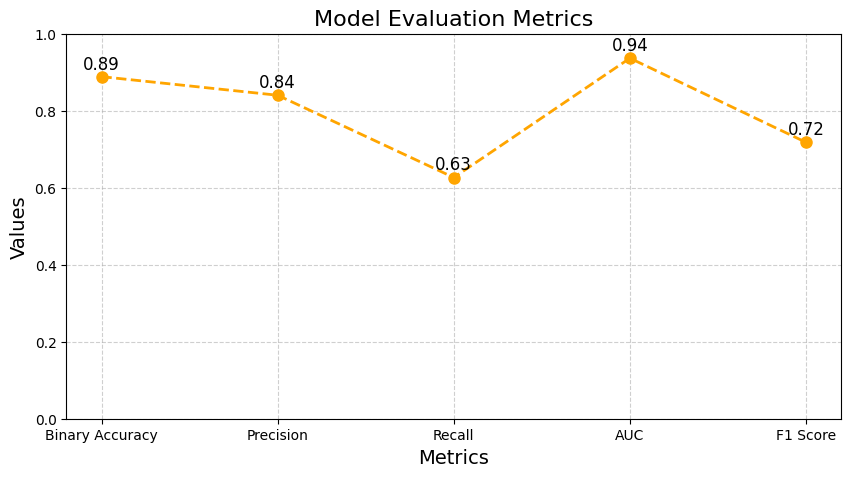

In [30]:
import matplotlib.pyplot as plt

# Define the metrics and their values
metrics = {
    "Binary Accuracy": 0.8885,
    "Precision": 0.8402,
    "Recall": 0.6265,
    "AUC": 0.9365,
    "F1 Score": 0.7178
}
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

# Line plot for the metrics
plt.figure(figsize=(10, 5))
plt.plot(metric_names, metric_values, marker='o', color='orange', linewidth=2, linestyle='--', markersize=8)
plt.title("Model Evaluation Metrics", fontsize=16)
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for better readability
plt.grid(True, linestyle='--', alpha=0.6)  # Add a light grid for readability

# Add data labels for each point
for i, value in enumerate(metric_values):
    plt.text(i, value + 0.02, f"{value:.2f}", ha='center', fontsize=12)

plt.show()


In [28]:
# Save the model for future use
model.save("face_to_text_cnn_model.h5")
print("Model saved as face_to_text_cnn_model.h5")


Model saved as face_to_text_cnn_model.h5


In [1]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("face_to_text_cnn_model.h5")
print("Model loaded from face_to_text_cnn_model.h5")


Model loaded from face_to_text_cnn_model.h5


In [3]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved model
model = load_model("face_to_text_cnn_model.h5")
print("Model loaded from face_to_text_cnn_model.h5")

# List all layers to identify the correct layer for feature extraction
print("\nModel layers:")
for i, layer in enumerate(model.layers):
    print(f"Layer {i}: {layer.name}")

# Update with the correct layer name (adjust this based on the output of the above code)
# Example: If the correct layer for feature extraction is 'batch_normalization_37'
feature_extraction_model = Model(
    inputs=model.input,
    outputs=model.get_layer('batch_normalization_37').output  # Replace with the correct layer name
)
print("\nFeature extraction model created successfully.")

# Load the dataset for feature extraction
attributes_df = pd.read_csv('list_attr_celeba (1).csv')

# Convert -1 to 0 for binary classification
for column in attributes_df.columns[1:]:
    attributes_df[column] = attributes_df[column].replace(-1, 0)

# Select 4000 images for feature extraction
subset_df = attributes_df.sample(n=4000, random_state=42)

# Set up ImageDataGenerator for feature extraction
datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Create the data generator
data_generator = datagen.flow_from_dataframe(
    dataframe=subset_df,
    directory='img_align_celeba',  # Update with the correct path
    x_col='File_name',
    y_col=None,  # We only need the images, not the labels
    target_size=(128, 128),
    batch_size=64,
    class_mode=None,
    shuffle=False  # No shuffling to maintain order
)

# Extract features for all images in the subset
features = feature_extraction_model.predict(data_generator, verbose=1)

# Save the extracted features to a file for future use
np.save('extracted_features.npy', features)
print("Features extracted and saved to 'extracted_features.npy'")


Model loaded from face_to_text_cnn_model.h5

Model layers:
Layer 0: conv2d_24
Layer 1: batch_normalization_36
Layer 2: max_pooling2d_24
Layer 3: dropout_46
Layer 4: conv2d_25
Layer 5: batch_normalization_37
Layer 6: max_pooling2d_25
Layer 7: dropout_47
Layer 8: conv2d_26
Layer 9: batch_normalization_38
Layer 10: max_pooling2d_26
Layer 11: dropout_48
Layer 12: conv2d_27
Layer 13: batch_normalization_39
Layer 14: max_pooling2d_27
Layer 15: dropout_49
Layer 16: flatten_6
Layer 17: dense_27
Layer 18: batch_normalization_40
Layer 19: dropout_50
Layer 20: dense_28
Layer 21: batch_normalization_41
Layer 22: dropout_51
Layer 23: dense_29

Feature extraction model created successfully.
Found 4000 validated image filenames.
63/63 [==============================] - 96s 2s/step
Features extracted and saved to 'extracted_features.npy'


In [14]:
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Load previously extracted features
features = np.load('extracted_features.npy')
print(f"Extracted features loaded successfully with shape: {features.shape}")

# Load the dataset for text descriptions
text_data = pd.read_csv('text_shuffle_descr_celeba.csv')  # Ensure this is the correct file
text_descriptions = text_data['text_description'][:4000]  # Use descriptions for the same 4000 images

# Tokenize and preprocess text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_descriptions)
sequences = tokenizer.texts_to_sequences(text_descriptions)

# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary size: {vocab_size}")

# Pad sequences to make uniform length
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Prepare input-output pairs for the LSTM model
X = features  # Loaded features
y = to_categorical(padded_sequences, num_classes=vocab_size)
print(f"Prepared text data with shape {y.shape} and features for LSTM.")


Extracted features loaded successfully with shape: (4000, 4608)
Vocabulary size: 79
Prepared text data with shape (4000, 58, 79) and features for LSTM.


In [3]:
import numpy as np
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pickle

# **Step 1: Load the CNN Model**
cnn_model = load_model("face_to_text_cnn_model.h5")
print("CNN Model loaded successfully.")

# List all layers to select the correct one
for i, layer in enumerate(cnn_model.layers):
    print(f"Layer {i}: {layer.name}, Output Shape: {layer.output_shape}")

# Update with the correct layer name for feature extraction
feature_extraction_model = Model(
    inputs=cnn_model.input,
    outputs=cnn_model.get_layer('flatten_6').output  # Replace with the correct layer name
)
print("Feature extraction model created successfully.")

# **Step 2: Load the LSTM Model**
lstm_model = load_model("text_generation_lstm_model.h5")
print("LSTM model loaded successfully.")

# Load the tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)
print("Tokenizer loaded successfully.")

# Reverse word index for decoding
index_word = {v: k for k, v in tokenizer.word_index.items()}

# **Step 3: Preprocess the Image**
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(128, 128))  # Resize to CNN input size
    image = img_to_array(image)
    image = image / 255.0  # Normalize to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

image_path = r"C:\Users\Riddhi Sharama\Desktop\flask-authentication-system\000028.jpg"
processed_image = preprocess_image(image_path)
print("Image preprocessed successfully.")

# **Step 4: Extract Features Using CNN**
features = feature_extraction_model.predict(processed_image)
print("Extracted features shape:", features.shape)

# **Step 5: Flatten Features if Needed**
if len(features.shape) > 2:  # Flatten only if not already flattened
    features = features.reshape(1, -1)
print("Flattened features shape:", features.shape)

# **Step 6: Generate Text Description**
max_sequence_length = 58  # Same as used during training
generated_sequence = []

current_sequence = np.zeros((1, max_sequence_length), dtype=int)

for i in range(max_sequence_length):
    predictions = lstm_model.predict(features)  # Pass the flattened features
    predicted_word_id = np.argmax(predictions[0, i])  # Get the word ID with the highest probability
    predicted_word = index_word.get(predicted_word_id, '')

    if predicted_word == '':  # Stop if no valid word is found
        break

    generated_sequence.append(predicted_word)
    current_sequence[0, i] = predicted_word_id

# Join the generated words
generated_description = ' '.join(generated_sequence)
print("\nGenerated Description:", generated_description)


CNN Model loaded successfully.
Layer 0: conv2d_24, Output Shape: (None, 126, 126, 16)
Layer 1: batch_normalization_36, Output Shape: (None, 126, 126, 16)
Layer 2: max_pooling2d_24, Output Shape: (None, 63, 63, 16)
Layer 3: dropout_46, Output Shape: (None, 63, 63, 16)
Layer 4: conv2d_25, Output Shape: (None, 61, 61, 32)
Layer 5: batch_normalization_37, Output Shape: (None, 61, 61, 32)
Layer 6: max_pooling2d_25, Output Shape: (None, 30, 30, 32)
Layer 7: dropout_47, Output Shape: (None, 30, 30, 32)
Layer 8: conv2d_26, Output Shape: (None, 28, 28, 64)
Layer 9: batch_normalization_38, Output Shape: (None, 28, 28, 64)
Layer 10: max_pooling2d_26, Output Shape: (None, 14, 14, 64)
Layer 11: dropout_48, Output Shape: (None, 14, 14, 64)
Layer 12: conv2d_27, Output Shape: (None, 12, 12, 128)
Layer 13: batch_normalization_39, Output Shape: (None, 12, 12, 128)
Layer 14: max_pooling2d_27, Output Shape: (None, 6, 6, 128)
Layer 15: dropout_49, Output Shape: (None, 6, 6, 128)
Layer 16: flatten_6, Output

In [6]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed, RepeatVector, BatchNormalization, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
import pickle

# **Step 1: Load Pre-Extracted Features**
features = np.load('extracted_features.npy')  # Ensure the correct file path
print(f"Loaded features with shape: {features.shape}")

# **Step 2: Load and Tokenize Text Descriptions**
# Load text descriptions
text_data = pd.read_csv('text_shuffle_descr_celeba.csv')  # Ensure the correct file path
text_data['text_description'] = text_data['text_description'].str.lower()  # Lowercase all text
text_descriptions = text_data['text_description'][:4000]  # Use the first 4000 descriptions

# Tokenize text
tokenizer = Tokenizer(num_words=5000)  # Limit vocabulary size to reduce noise
tokenizer.fit_on_texts(text_descriptions)

# Save the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
print("Tokenizer saved successfully.")

# Prepare sequences
vocab_size = len(tokenizer.word_index) + 1
sequences = tokenizer.texts_to_sequences(text_descriptions)
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# One-hot encode y
y = np.array([to_categorical(seq, num_classes=vocab_size) for seq in padded_sequences])
print(f"Shape of y (one-hot encoded): {y.shape}")

# **Step 3: Define the Functional LSTM Model with Attention**
def attention_layer(inputs):
    hidden_size = int(inputs.shape[2])  # Hidden size of LSTM
    score_first_part = Dense(hidden_size, use_bias=False)(inputs)
    h_t = Dense(hidden_size, use_bias=False)(inputs)
    score = Activation('tanh')(score_first_part + h_t)
    attention_weights = Dense(1, activation='softmax')(score)
    context_vector = inputs * attention_weights
    return context_vector

# Define model inputs
feature_input = Input(shape=(features.shape[1],), name='feature_input')
sequence_input = Input(shape=(max_sequence_length,), name='sequence_input')

# Feature branch
feature_dense = Dense(512, activation='relu', name='feature_dense')(feature_input)
feature_dense = BatchNormalization()(feature_dense)
feature_dense = Dropout(0.5)(feature_dense)
feature_repeated = RepeatVector(max_sequence_length)(feature_dense)

# LSTM branch with attention
lstm_input = LSTM(512, return_sequences=True, dropout=0.3, recurrent_dropout=0.3, kernel_regularizer=l2(0.01))(feature_repeated)
attention_output = attention_layer(lstm_input)
lstm_output = LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)(attention_output)

# Output layer
output = TimeDistributed(Dense(vocab_size, activation='softmax'))(lstm_output)

# Compile model
model = Model(inputs=[feature_input], outputs=output)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
print("Improved Functional LSTM model with attention defined successfully.")

# **Step 4: Callbacks**
checkpoint = ModelCheckpoint(
    "text_generation_lstm_model.h5",
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

# **Step 5: Train the Model**
history = model.fit(
    [features], y,  # Features and labels
    batch_size=32,  # Smaller batch size for better gradient updates
    epochs=20,  # Train for full 20 epochs
    validation_split=0.2,  # Use 20% for validation
    callbacks=[checkpoint, reduce_lr],  # No early stopping
    verbose=1
)

print("Improved LSTM model with attention trained and saved as 'text_generation_lstm_model.h5'.")


Loaded features with shape: (4000, 4608)
Tokenizer saved successfully.
Shape of y (one-hot encoded): (4000, 58, 79)
Improved Functional LSTM model with attention defined successfully.
Epoch 1/20
100/100 [==============================] - ETA: 0s - loss: 4.7890 - accuracy: 0.5101
Epoch 1: val_loss improved from inf to 2.99830, saving model to text_generation_lstm_model.h5
100/100 [==============================] - 233s 2s/step - loss: 4.7890 - accuracy: 0.5101 - val_loss: 2.9983 - val_accuracy: 0.5007 - lr: 0.0010
Epoch 2/20
100/100 [==============================] - ETA: 0s - loss: 2.3833 - accuracy: 0.5480
Epoch 2: val_loss improved from 2.99830 to 2.23201, saving model to text_generation_lstm_model.h5
100/100 [==============================] - 184s 2s/step - loss: 2.3833 - accuracy: 0.5480 - val_loss: 2.2320 - val_accuracy: 0.5421 - lr: 0.0010
Epoch 3/20
100/100 [==============================] - ETA: 0s - loss: 2.2126 - accuracy: 0.5480
Epoch 3: val_loss did not improve from 2.23201

In [13]:
import os
import numpy as np
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pickle

# **Step 1: Sampling Function with Temperature**
def sample_with_temperature(predictions, temperature=1.0):
    predictions = np.asarray(predictions).astype("float64")
    predictions = np.log(predictions + 1e-10) / temperature
    exp_preds = np.exp(predictions)
    probabilities = exp_preds / np.sum(exp_preds)
    return np.random.choice(len(probabilities), p=probabilities)

# **Step 2: Load Pre-Trained Models and Tokenizer**
try:
    # Load CNN model for feature extraction
    cnn_model = load_model("face_to_text_cnn_model.h5")
    feature_extraction_model = Model(
        inputs=cnn_model.input,
        outputs=cnn_model.get_layer('flatten_6').output  # Replace with the correct layer name
    )
    print("Feature extraction model loaded successfully.")

    # Load LSTM model for text generation
    lstm_model = load_model("text_generation_lstm_model.h5")
    print("LSTM model loaded successfully.")

    # Load the tokenizer
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)
    print("Tokenizer loaded successfully.")

    # Reverse word index for decoding
    index_word = {v: k for k, v in tokenizer.word_index.items()}
except Exception as e:
    print("Error loading models or tokenizer:", str(e))
    exit()

# **Step 3: Preprocess the Input Image**
def preprocess_image(image_path):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"The file {image_path} does not exist.")
    image = load_img(image_path, target_size=(128, 128))  # Resize to match CNN input
    image = img_to_array(image) / 255.0  # Normalize
    return np.expand_dims(image, axis=0)

# Replace with the path to your input image
image_path = r"000034.jpg"  # Example image path
try:
    processed_image = preprocess_image(image_path)
    print("Image preprocessed successfully.")
except Exception as e:
    print("Error preprocessing image:", str(e))
    exit()

# **Step 4: Extract Features Using CNN**
try:
    features = feature_extraction_model.predict(processed_image)
    features = features.reshape(1, -1)  # Flatten features to match LSTM input
    print("Extracted features shape:", features.shape)
except Exception as e:
    print("Error during feature extraction:", str(e))
    exit()

# **Step 5: Generate Text Description**
max_sequence_length = 58  # As defined during training
generated_sequence = []
current_sequence = np.zeros((1, max_sequence_length), dtype=int)

try:
    for i in range(max_sequence_length):
        # Predict the next word
        predictions = lstm_model.predict(features)
        predicted_word_id = sample_with_temperature(predictions[0, i], temperature=0.7)  # Use temperature sampling
        predicted_word = index_word.get(predicted_word_id, '')

        # Stop if no valid word is found
        if predicted_word == '':
            break

        # Append the word to the sequence
        generated_sequence.append(predicted_word)

        # Stop if repetitive words are detected
        if len(generated_sequence) > 3 and generated_sequence[-1] == generated_sequence[-2] == generated_sequence[-3]:
            print("Stopping due to repetition.")
            break
except Exception as e:
    print("Error during text generation:", str(e))
    exit()

# Join the generated words into a sentence
generated_description = ' '.join(generated_sequence)
print("\nGenerated Description:", generated_description)


Feature extraction model loaded successfully.
LSTM model loaded successfully.
Tokenizer loaded successfully.
Image preprocessed successfully.
1/1 [==============================] - 0s 87ms/step
Extracted features shape: (1, 4608)
1/1 [==============================] - 0s 181ms/step

Generated Description: he lady arched chubby and hair has a is nose nose and seems makeup looks she he


In [24]:
import numpy as np
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pickle

# Sampling function with temperature
def sample_with_temperature(predictions, temperature=0.5):
    predictions = np.asarray(predictions).astype("float64")
    predictions = np.log(predictions + 1e-10) / temperature
    exp_preds = np.exp(predictions)
    probabilities = exp_preds / np.sum(exp_preds)
    return np.random.choice(len(probabilities), p=probabilities)

# Load Models and Tokenizer
cnn_model = load_model("face_to_text_cnn_model.h5")
feature_extraction_model = Model(inputs=cnn_model.input, outputs=cnn_model.get_layer('flatten_6').output)
lstm_model = load_model("text_generation_lstm_model.h5")
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)
index_word = {v: k for k, v in tokenizer.word_index.items()}

# Preprocess Input Image
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(128, 128))
    image = img_to_array(image) / 255.0
    return np.expand_dims(image, axis=0)

image_path = '000028.jpg'  # Replace with actual path
processed_image = preprocess_image(image_path)

# Extract Features
features = feature_extraction_model.predict(processed_image)
features = features.reshape(1, -1)  # Flatten for LSTM input

# Generate Text Description
max_sequence_length = 58
generated_sequence = []
current_sequence = np.zeros((1, max_sequence_length), dtype=int)

for _ in range(max_sequence_length):
    predictions = lstm_model.predict(features)
    predicted_word_id = sample_with_temperature(predictions[0, len(generated_sequence)], temperature=0.5)
    predicted_word = index_word.get(predicted_word_id, '')

    if predicted_word == '':
        break
    generated_sequence.append(predicted_word)

    if len(generated_sequence) > 3 and len(set(generated_sequence[-3:])) == 1:
        break  # Stop on repetition

generated_description = ' '.join(generated_sequence)
print("\nGenerated Description:", generated_description)


1/1 [==============================] - 0s 194ms/step

Generated Description: the has is lipstick open hair she and hair a and young has and the


In [44]:
import numpy as np
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pickle

# Sampling function with temperature
def sample_with_temperature(predictions, temperature=0.5):
    predictions = np.asarray(predictions).astype("float64")
    predictions = np.log(predictions + 1e-10) / temperature
    exp_preds = np.exp(predictions)
    probabilities = exp_preds / np.sum(exp_preds)
    return np.random.choice(len(probabilities), p=probabilities)

# Load Models and Tokenizer
cnn_model = load_model("face_to_text_cnn_model.h5")
feature_extraction_model = Model(inputs=cnn_model.input, outputs=cnn_model.get_layer('flatten_6').output)
lstm_model = load_model("text_generation_lstm_model.h5")
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)
index_word = {v: k for k, v in tokenizer.word_index.items()}

# Preprocess Input Image
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(128, 128))
    image = img_to_array(image) / 255.0
    return np.expand_dims(image, axis=0)

image_path = 'girlmakeup.jpg'  # Replace with actual path
processed_image = preprocess_image(image_path)

# Extract Features
features = feature_extraction_model.predict(processed_image)
features = features.reshape(1, -1)  # Flatten for LSTM input

# Generate Text Description
max_sequence_length = 58
generated_sequence = []
current_sequence = np.zeros((1, max_sequence_length), dtype=int)

for _ in range(max_sequence_length):
    predictions = lstm_model.predict(features)
    predicted_word_id = sample_with_temperature(predictions[0, len(generated_sequence)], temperature=0.5)
    predicted_word = index_word.get(predicted_word_id, '')

    if predicted_word == '':
        break
    generated_sequence.append(predicted_word)

    if len(generated_sequence) > 3 and len(set(generated_sequence[-3:])) == 1:
        break  # Stop on repetition

generated_description = ' '.join(generated_sequence)
print("\nGenerated Description:", generated_description)


1/1 [==============================] - 0s 237ms/step

Generated Description: she is wearing lipstick and and he she has has and hair


In [40]:
import numpy as np
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pickle

# Sampling function with temperature
def sample_with_temperature(predictions, temperature=0.5):
    predictions = np.asarray(predictions).astype("float64")
    predictions = np.log(predictions + 1e-10) / temperature
    exp_preds = np.exp(predictions)
    probabilities = exp_preds / np.sum(exp_preds)
    return np.random.choice(len(probabilities), p=probabilities)

# Load Models and Tokenizer
cnn_model = load_model("face_to_text_cnn_model.h5")
feature_extraction_model = Model(inputs=cnn_model.input, outputs=cnn_model.get_layer('flatten_6').output)
lstm_model = load_model("text_generation_lstm_model.h5")
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)
index_word = {v: k for k, v in tokenizer.word_index.items()}

# Preprocess Input Image
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(128, 128))
    image = img_to_array(image) / 255.0
    return np.expand_dims(image, axis=0)

image_path = '000053.jpg'  # Replace with actual path
processed_image = preprocess_image(image_path)

# Extract Features
features = feature_extraction_model.predict(processed_image)
features = features.reshape(1, -1)  # Flatten for LSTM input

# Generate Text Description
max_sequence_length = 58
generated_sequence = []
current_sequence = np.zeros((1, max_sequence_length), dtype=int)

for _ in range(max_sequence_length):
    predictions = lstm_model.predict(features)
    predicted_word_id = sample_with_temperature(predictions[0, len(generated_sequence)], temperature=0.5)
    predicted_word = index_word.get(predicted_word_id, '')

    if predicted_word == '':
        break
    generated_sequence.append(predicted_word)

    if len(generated_sequence) > 3 and len(set(generated_sequence[-3:])) == 1:
        break  # Stop on repetition

generated_description = ' '.join(generated_sequence)
print("\nGenerated Description:", generated_description)


1/1 [==============================] - 0s 186ms/step

Generated Description: she has a lipstick and hair cheekbones and and is has has open has has


In [45]:
import nltk
nltk.__version__


'3.9.1'

In [52]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to C:\Users\Riddhi
[nltk_data]     Sharama\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Riddhi
[nltk_data]     Sharama\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [54]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed, RepeatVector, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import pickle
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Ensure required nltk resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# **Step 1: Load Pre-Extracted Features**
features = np.load('extracted_features.npy')  # Ensure the correct file path
print(f"Loaded features with shape: {features.shape}")

# **Step 2: Load and Preprocess Text Descriptions**
text_data = pd.read_csv('text_shuffle_descr_celeba.csv')  # Ensure the correct file path
text_descriptions = text_data['text_description'][:2000]  # Use only 2000 descriptions for this training

# Text preprocessing setup
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    try:
        # Lowercase the text
        text = text.lower()
        # Remove punctuation and non-alphanumeric characters
        text = re.sub(r'[^\w\s]', '', text)
        # Tokenize using NLTK's word_tokenize (this uses 'punkt' tokenizer)
        tokens = word_tokenize(text)
        # Remove stopwords and lemmatize
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return ' '.join(tokens)
    except Exception as e:
        print(f"Error in preprocessing text: {e}")
        raise

# Apply preprocessing to all descriptions
text_descriptions = text_descriptions.apply(preprocess_text)
print("Text preprocessing completed.")

# **Step 3: Tokenize Text**
tokenizer = Tokenizer(num_words=5000)  # Limit vocabulary size
tokenizer.fit_on_texts(text_descriptions)

# Save the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
print("Tokenizer saved successfully.")

# Prepare sequences
vocab_size = len(tokenizer.word_index) + 1
sequences = tokenizer.texts_to_sequences(text_descriptions)
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# One-hot encode y
y = np.array([to_categorical(seq, num_classes=vocab_size) for seq in padded_sequences])
print(f"Shape of y (one-hot encoded): {y.shape}")

# **Step 4: Define the LSTM Model**
model = Sequential()

# Input Layer
model.add(Dense(256, activation='relu', input_shape=(features.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Recurrent Layers
model.add(RepeatVector(max_sequence_length))
model.add(LSTM(512, return_sequences=True, dropout=0.3, recurrent_dropout=0.3))
model.add(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.3))

# Output Layer
model.add(TimeDistributed(Dense(vocab_size, activation='softmax')))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Improved LSTM model defined successfully. ")

# **Step 5: Callbacks**
checkpoint = ModelCheckpoint(
    "text_generation_lstm_model.h5",
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

# **Step 6: Train the Model**
history = model.fit(
    features[:2000], y,  # Use only the first 2000 data points
    batch_size=32,
    epochs=20,
    validation_split=0.2,
    callbacks=[checkpoint, reduce_lr],
    verbose=1
)

print("Improved LSTM model trained and saved as 'textlstm_model.h5'. ")


[nltk_data] Downloading package punkt to C:\Users\Riddhi
[nltk_data]     Sharama\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Riddhi
[nltk_data]     Sharama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Riddhi
[nltk_data]     Sharama\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Loaded features with shape: (4000, 4608)
Text preprocessing completed.
Tokenizer saved successfully.
Shape of y (one-hot encoded): (2000, 33, 67)
Improved LSTM model defined successfully. 
Epoch 1/20
50/50 [==============================] - ETA: 0s - loss: 2.5333 - accuracy: 0.4996
Epoch 1: val_loss improved from inf to 2.48245, saving model to text_generation_lstm_model.h5
50/50 [==============================] - 63s 1s/step - loss: 2.5333 - accuracy: 0.4996 - val_loss: 2.4825 - val_accuracy: 0.5214 - lr: 0.0010
Epoch 2/20
50/50 [==============================] - ETA: 0s - loss: 2.1486 - accuracy: 0.5516
Epoch 2: val_loss improved from 2.48245 to 2.06804, saving model to text_generation_lstm_model.h5
50/50 [==============================] - 61s 1s/step - loss: 2.1486 - accuracy: 0.5516 - val_loss: 2.0680 - val_accuracy: 0.5702 - lr: 0.0010
Epoch 3/20
50/50 [==============================] - ETA: 0s - loss: 2.0915 - accuracy: 0.5573
Epoch 3: val_loss improved from 2.06804 to 2.02637, s

In [55]:
import numpy as np
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pickle

# Sampling function with temperature (for diversity in text generation)
def sample_with_temperature(predictions, temperature=0.5):
    predictions = np.asarray(predictions).astype("float64")
    predictions = np.log(predictions + 1e-10) / temperature
    exp_preds = np.exp(predictions)
    probabilities = exp_preds / np.sum(exp_preds)
    return np.random.choice(len(probabilities), p=probabilities)

# Load Models and Tokenizer
cnn_model = load_model("face_to_text_cnn_model.h5")  # Load the CNN model used for feature extraction
feature_extraction_model = Model(inputs=cnn_model.input, outputs=cnn_model.get_layer('flatten_6').output)  # Extract features from the CNN model

lstm_model = load_model("text_generation_lstm_model.h5")  # Load the trained LSTM model for text generation

with open('tokenizer.pickle', 'rb') as handle:  # Load the tokenizer
    tokenizer = pickle.load(handle)

index_word = {v: k for k, v in tokenizer.word_index.items()}  # Reverse the tokenizer's word_index

# Preprocess Input Image
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(128, 128))  # Resize image to match input size of CNN
    image = img_to_array(image) / 255.0  # Normalize image to [0,1]
    return np.expand_dims(image, axis=0)

# Path to the image (you should replace it with the actual image path)
image_path = 'girlmakeup.jpg'  # Replace with the actual image path
processed_image = preprocess_image(image_path)

# Extract Features from Image using CNN
features = feature_extraction_model.predict(processed_image)
features = features.reshape(1, -1)  # Flatten the output for LSTM input

# Generate Text Description with LSTM
max_sequence_length = 58  # Define max sequence length (this should be the same as used during training)
generated_sequence = []
current_sequence = np.zeros((1, max_sequence_length), dtype=int)

for _ in range(max_sequence_length):
    predictions = lstm_model.predict(features)  # Get predictions from the LSTM model
    predicted_word_id = sample_with_temperature(predictions[0, len(generated_sequence)], temperature=0.5)
    predicted_word = index_word.get(predicted_word_id, '')  # Get the word corresponding to the predicted index

    if predicted_word == '':
        break  # Stop if we get an empty word (indicating end of sequence)
    
    generated_sequence.append(predicted_word)  # Append the predicted word to the sequence

    if len(generated_sequence) > 3 and len(set(generated_sequence[-3:])) == 1:
        break  # Stop if there's a repetitive pattern

# Join the words into a generated description
generated_description = ' '.join(generated_sequence)
print("\nGenerated Description:", generated_description)


1/1 [==============================] - 0s 113ms/step

Generated Description: lady attractive nose attractive hair young open hair


In [61]:
import numpy as np
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pickle

# Sampling function with temperature (for diversity in text generation)
def sample_with_temperature(predictions, temperature=0.5):
    predictions = np.asarray(predictions).astype("float64")
    predictions = np.log(predictions + 1e-10) / temperature
    exp_preds = np.exp(predictions)
    probabilities = exp_preds / np.sum(exp_preds)
    return np.random.choice(len(probabilities), p=probabilities)

# Load Models and Tokenizer
cnn_model = load_model("face_to_text_cnn_model.h5")  # Load the CNN model used for feature extraction
feature_extraction_model = Model(inputs=cnn_model.input, outputs=cnn_model.get_layer('flatten_6').output)  # Extract features from the CNN model

lstm_model = load_model("text_generation_lstm_model.h5")  # Load the trained LSTM model for text generation

with open('tokenizer.pickle', 'rb') as handle:  # Load the tokenizer
    tokenizer = pickle.load(handle)

index_word = {v: k for k, v in tokenizer.word_index.items()}  # Reverse the tokenizer's word_index

# Preprocess Input Image
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(128, 128))  # Resize image to match input size of CNN
    image = img_to_array(image) / 255.0  # Normalize image to [0,1]
    return np.expand_dims(image, axis=0)

# Path to the image (you should replace it with the actual image path)
image_path = 'smiling.jpeg'  # Replace with the actual image path
processed_image = preprocess_image(image_path)

# Extract Features from Image using CNN
features = feature_extraction_model.predict(processed_image)
features = features.reshape(1, -1)  # Flatten the output for LSTM input

# Generate Text Description with LSTM
max_sequence_length = 58  # Define max sequence length (this should be the same as used during training)
generated_sequence = []
current_sequence = np.zeros((1, max_sequence_length), dtype=int)

for _ in range(max_sequence_length):
    predictions = lstm_model.predict(features)  # Get predictions from the LSTM model
    predicted_word_id = sample_with_temperature(predictions[0, len(generated_sequence)], temperature=0.5)
    predicted_word = index_word.get(predicted_word_id, '')  # Get the word corresponding to the predicted index

    if predicted_word == '':
        break  # Stop if we get an empty word (indicating end of sequence)
    
    generated_sequence.append(predicted_word)  # Append the predicted word to the sequence

    if len(generated_sequence) > 3 and len(set(generated_sequence[-3:])) == 1:
        break  # Stop if there's a repetitive pattern

# Join the words into a generated description
generated_description = ' '.join(generated_sequence)
print("\nGenerated Description:", generated_description)


1/1 [==============================] - 0s 132ms/step

Generated Description: big cheekbone big young young pointy wearing oval


In [70]:
import numpy as np
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pickle

# Sampling function with temperature (for diversity in text generation)
def sample_with_temperature(predictions, temperature=0.5):
    predictions = np.asarray(predictions).astype("float64")
    predictions = np.log(predictions + 1e-10) / temperature
    exp_preds = np.exp(predictions)
    probabilities = exp_preds / np.sum(exp_preds)
    return np.random.choice(len(probabilities), p=probabilities)

# Load Models and Tokenizer
cnn_model = load_model("face_to_text_cnn_model.h5")  # Load the CNN model used for feature extraction
feature_extraction_model = Model(inputs=cnn_model.input, outputs=cnn_model.get_layer('flatten_6').output)  # Extract features from the CNN model

lstm_model = load_model("text_generation_lstm_model.h5")  # Load the trained LSTM model for text generation

with open('tokenizer.pickle', 'rb') as handle:  # Load the tokenizer
    tokenizer = pickle.load(handle)

index_word = {v: k for k, v in tokenizer.word_index.items()}  # Reverse the tokenizer's word_index

# Preprocess Input Image
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(128, 128))  # Resize image to match input size of CNN
    image = img_to_array(image) / 255.0  # Normalize image to [0,1]
    return np.expand_dims(image, axis=0)

# Path to the image (you should replace it with the actual image path)
image_path = 'images.jpeg'  # Replace with the actual image path
processed_image = preprocess_image(image_path)

# Extract Features from Image using CNN
features = feature_extraction_model.predict(processed_image)
features = features.reshape(1, -1)  # Flatten the output for LSTM input

# Generate Text Description with LSTM
max_sequence_length = 58  # Define max sequence length (this should be the same as used during training)
generated_sequence = []
current_sequence = np.zeros((1, max_sequence_length), dtype=int)

for _ in range(max_sequence_length):
    predictions = lstm_model.predict(features)  # Get predictions from the LSTM model
    predicted_word_id = sample_with_temperature(predictions[0, len(generated_sequence)], temperature=0.5)
    predicted_word = index_word.get(predicted_word_id, '')  # Get the word corresponding to the predicted index

    if predicted_word == '':
        break  # Stop if we get an empty word (indicating end of sequence)
    
    generated_sequence.append(predicted_word)  # Append the predicted word to the sequence

    if len(generated_sequence) > 3 and len(set(generated_sequence[-3:])) == 1:
        break  # Stop if there's a repetitive pattern

# Join the words into a generated description
generated_description = ' '.join(generated_sequence)
print("\nGenerated Description:", generated_description)


1/1 [==============================] - 0s 133ms/step

Generated Description: female young nose mouth lady big young


In [71]:
import numpy as np
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pickle

# Sampling function with temperature (for diversity in text generation)
def sample_with_temperature(predictions, temperature=0.5):
    predictions = np.asarray(predictions).astype("float64")
    predictions = np.log(predictions + 1e-10) / temperature
    exp_preds = np.exp(predictions)
    probabilities = exp_preds / np.sum(exp_preds)
    return np.random.choice(len(probabilities), p=probabilities)

# Load Models and Tokenizer
cnn_model = load_model("face_to_text_cnn_model.h5")  # Load the CNN model used for feature extraction
feature_extraction_model = Model(inputs=cnn_model.input, outputs=cnn_model.get_layer('flatten_6').output)  # Extract features from the CNN model

lstm_model = load_model("text_generation_lstm_model.h5")  # Load the trained LSTM model for text generation

with open('tokenizer.pickle', 'rb') as handle:  # Load the tokenizer
    tokenizer = pickle.load(handle)

index_word = {v: k for k, v in tokenizer.word_index.items()}  # Reverse the tokenizer's word_index

# Preprocess Input Image
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(128, 128))  # Resize image to match input size of CNN
    image = img_to_array(image) / 255.0  # Normalize image to [0,1]
    return np.expand_dims(image, axis=0)

# Path to the image (you should replace it with the actual image path)
image_path = '000262.jpg'  # Replace with the actual image path
processed_image = preprocess_image(image_path)

# Extract Features from Image using CNN
features = feature_extraction_model.predict(processed_image)
features = features.reshape(1, -1)  # Flatten the output for LSTM input

# Generate Text Description with LSTM
max_sequence_length = 58  # Define max sequence length (this should be the same as used during training)
generated_sequence = []
current_sequence = np.zeros((1, max_sequence_length), dtype=int)

for _ in range(max_sequence_length):
    predictions = lstm_model.predict(features)  # Get predictions from the LSTM model
    predicted_word_id = sample_with_temperature(predictions[0, len(generated_sequence)], temperature=0.5)
    predicted_word = index_word.get(predicted_word_id, '')  # Get the word corresponding to the predicted index

    if predicted_word == '':
        break  # Stop if we get an empty word (indicating end of sequence)
    
    generated_sequence.append(predicted_word)  # Append the predicted word to the sequence

    if len(generated_sequence) > 3 and len(set(generated_sequence[-3:])) == 1:
        break  # Stop if there's a repetitive pattern

# Join the words into a generated description
generated_description = ' '.join(generated_sequence)
print("\nGenerated Description:", generated_description)


1/1 [==============================] - 0s 94ms/step

Generated Description: face look look attractive young big slightly young attractive blond young young


1/1 [==============================] - 0s 91ms/step


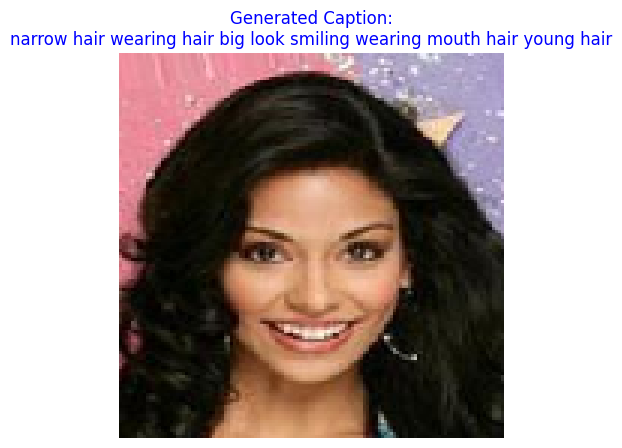

In [7]:
import numpy as np
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pickle
import matplotlib.pyplot as plt

# Sampling function with temperature (for diversity in text generation)
def sample_with_temperature(predictions, temperature=0.5):
    predictions = np.asarray(predictions).astype("float64")
    predictions = np.log(predictions + 1e-10) / temperature
    exp_preds = np.exp(predictions)
    probabilities = exp_preds / np.sum(exp_preds)
    return np.random.choice(len(probabilities), p=probabilities)

# Load Models and Tokenizer
cnn_model = load_model("face_to_text_cnn_model.h5")  # Load the CNN model used for feature extraction
feature_extraction_model = Model(inputs=cnn_model.input, outputs=cnn_model.get_layer('flatten_6').output)  # Extract features from the CNN model

lstm_model = load_model("text_generation_lstm_model.h5")  # Load the trained LSTM model for text generation

with open('tokenizer.pickle', 'rb') as handle:  # Load the tokenizer
    tokenizer = pickle.load(handle)

index_word = {v: k for k, v in tokenizer.word_index.items()}  # Reverse the tokenizer's word_index

# Preprocess Input Image
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(128, 128))  # Resize image to match input size of CNN
    image_array = img_to_array(image) / 255.0  # Normalize image to [0,1]
    return np.expand_dims(image_array, axis=0), image  # Return processed image and original image for display

# Path to the image (you should replace it with the actual image path)
image_path = '000262.jpg'  # Replace with the actual image path
processed_image, original_image = preprocess_image(image_path)

# Extract Features from Image using CNN
features = feature_extraction_model.predict(processed_image)
features = features.reshape(1, -1)  # Flatten the output for LSTM input

# Generate Text Description with LSTM
max_sequence_length = 58  # Define max sequence length (this should be the same as used during training)
generated_sequence = []
current_sequence = np.zeros((1, max_sequence_length), dtype=int)

for _ in range(max_sequence_length):
    predictions = lstm_model.predict(features)  # Get predictions from the LSTM model
    predicted_word_id = sample_with_temperature(predictions[0, len(generated_sequence)], temperature=0.5)
    predicted_word = index_word.get(predicted_word_id, '')  # Get the word corresponding to the predicted index

    if predicted_word == '':
        break  # Stop if we get an empty word (indicating end of sequence)
    
    generated_sequence.append(predicted_word)  # Append the predicted word to the sequence

    if len(generated_sequence) > 3 and len(set(generated_sequence[-3:])) == 1:
        break  # Stop if there's a repetitive pattern

# Join the words into a generated description
generated_description = ' '.join(generated_sequence)

# Display the input image and generated caption
plt.figure(figsize=(5, 5))
plt.imshow(original_image)  # Display the input image
plt.axis('off')
plt.title(f"Generated Caption:\n{generated_description}", fontsize=12, color='blue')
plt.show()


1/1 [==============================] - 0s 94ms/step


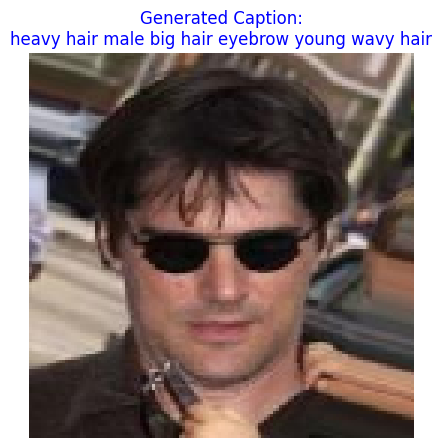

In [20]:
import numpy as np
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pickle
import matplotlib.pyplot as plt

# Sampling function with temperature (for diversity in text generation)
def sample_with_temperature(predictions, temperature=0.5):
    predictions = np.asarray(predictions).astype("float64")
    predictions = np.log(predictions + 1e-10) / temperature
    exp_preds = np.exp(predictions)
    probabilities = exp_preds / np.sum(exp_preds)
    return np.random.choice(len(probabilities), p=probabilities)

# Load Models and Tokenizer
cnn_model = load_model("face_to_text_cnn_model.h5")  # Load the CNN model used for feature extraction
feature_extraction_model = Model(inputs=cnn_model.input, outputs=cnn_model.get_layer('flatten_6').output)  # Extract features from the CNN model

lstm_model = load_model("text_generation_lstm_model.h5")  # Load the trained LSTM model for text generation

with open('tokenizer.pickle', 'rb') as handle:  # Load the tokenizer
    tokenizer = pickle.load(handle)

index_word = {v: k for k, v in tokenizer.word_index.items()}  # Reverse the tokenizer's word_index

# Preprocess Input Image
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(128, 128))  # Resize image to match input size of CNN
    image_array = img_to_array(image) / 255.0  # Normalize image to [0,1]
    return np.expand_dims(image_array, axis=0), image  # Return processed image and original image for display

# Path to the image (you should replace it with the actual image path)
image_path = '000053.jpg'  # Replace with the actual image path
processed_image, original_image = preprocess_image(image_path)

# Extract Features from Image using CNN
features = feature_extraction_model.predict(processed_image)
features = features.reshape(1, -1)  # Flatten the output for LSTM input

# Generate Text Description with LSTM
max_sequence_length = 58  # Define max sequence length (this should be the same as used during training)
generated_sequence = []
current_sequence = np.zeros((1, max_sequence_length), dtype=int)

for _ in range(max_sequence_length):
    predictions = lstm_model.predict(features)  # Get predictions from the LSTM model
    predicted_word_id = sample_with_temperature(predictions[0, len(generated_sequence)], temperature=0.5)
    predicted_word = index_word.get(predicted_word_id, '')  # Get the word corresponding to the predicted index

    if predicted_word == '':
        break  # Stop if we get an empty word (indicating end of sequence)
    
    generated_sequence.append(predicted_word)  # Append the predicted word to the sequence

    if len(generated_sequence) > 3 and len(set(generated_sequence[-3:])) == 1:
        break  # Stop if there's a repetitive pattern

# Join the words into a generated description
generated_description = ' '.join(generated_sequence)

# Display the input image and generated caption
plt.figure(figsize=(5, 5))
plt.imshow(original_image)  # Display the input image
plt.axis('off')
plt.title(f"Generated Caption:\n{generated_description}", fontsize=12, color='blue')
plt.show()
